# ST 443 Homework 2

## Question 1

For small $k$ the variance is high because the predictor $\hat{f}$ relies only on a few points around $x_i$. Thus, each of these points individually has a higher influence on the predictor, greatly increasing the influence of outliers and increasing the variance. The bias is lower because local effects can be captured more precisely, as the predictor is not influenced by "far-away" points.

For large $k$, the opposite is true.

## Question 2

For 1-nearest neighbours, the training error is zero because $\hat{f}(x_i) = x_i$; i.e. the predictor predicts exactly the observed $y$ value for any input $x$ in the training data (assuming all $x_i$ are unique). The test error must then be $36\%$ to get an average error rate of $18\%$. I would prefer to use logistic regression because it has a lower test error.

## Question 3

For any $X < 0$ and $X > 1$, the Bayes error rate is zero because the classification is deterministic

$f(x) = \begin{cases}
    1 & x < 0 \\
    0 & x > 1
\end{cases}$

For $0 \leq x \leq 1$, let's compute $p(y|X=x) \propto f(x|Y=y)p(y)$

$p(y) = \begin{cases}
    1/3 & y = 0 \\
    2/3 & y = 1
\end{cases}$

$f(x|Y=y) = \begin{cases}
    1/4 & y = 0 \\
    1/3 & y = 1
\end{cases}$

$p(y|X=x) = \begin{cases}
    1/12 & y = 0 \\
    2/9 & y = 1
\end{cases}$

so points $0 \leq x \leq 1$ are classified as $Y = 1$. The probability of misclassification is $(1/12)/(1/12 + 2/9) = 3/11$. The probability of $X$ falling in this range is
$$\mathbb{P}[0 \leq x \leq 1] = \mathbb{P}[0 \leq x \leq 1 | Y = 0]\mathbb{P}[Y = 0] + \mathbb{P}[0 \leq x \leq 1 | Y = 1]\mathbb{P}[Y = 1] = (1/4)(1/3) + (1/3)(2/3) = 11/36$$
The unavoidable error is the product of probability of $X$ being in this range times the probability of misclassification in this range
$$\boxed{\mathbb{E}\varepsilon(X) = 1/12}$$

## Question 4

### Part a
The Bayes classifier is
$\psi(x) = \begin{cases}
    0 & 1/4 \leq x \leq 3/4 \\
    1 & \textrm{otherwise}
\end{cases}$

### Part b
$$R^* = \mathbb{E} 1[\psi(X) \neq Y] = \mathbb{E}_X \mathbb{E}_{Y|X} [1[\psi(X) \neq Y] | X = x] = \int_0^1 \sum_{y=0,1} 1[\psi(x) \neq y] p(y|X=x) dx$$
$$ = \int_0^1(1[\psi(x)=0]*p(1|X=x) + 1[\psi(x)=1]*p(0|X=x)) dx$$
$$ = \int_{1/4}^{3/4} 2|x-1/2| dx + \left(\int_0^{1/4} + \int_{3/4}^1\right) (1-2|x-1/2|) dx$$
$$\boxed{R^* = 1/4}



## Question 5

By Bayes's rule, $p(y|X=x) \propto f(x|Y=y) p(y)$. We are given $p(y)$ and $f(x|Y=y)$

$p(y) = \begin{cases}
    2/5 & y = 1 \\
    2/5 & y = 2 \\
    1/5 & y = 3
\end{cases}$

$f(x|Y=y) = \begin{cases}
    f_{N(\mu_1, \Sigma)}(x) & y = 1 \\
    f_{N(\mu_2, \Sigma)}(x) & y = 2 \\
    0.5 f_{N(\mu_{31}, \Sigma)}(x) + 0.5 f_{N(\mu_{32}, \Sigma)}(x) & y = 3
\end{cases}$

Multiplying these two gives

$p(y|X=x) \propto \begin{cases}
    0.4 f_{N(\mu_1, \Sigma)}(x) & y = 1 \\
    0.4 f_{N(\mu_2, \Sigma)}(x) & y = 2 \\
    0.1 f_{N(\mu_{31}, \Sigma)}(x) + 0.1 f_{N(\mu_{32}, \Sigma)}(x) & y = 3
\end{cases}$

Evaluating these at $x_0 = (0.3, 0.3)^T$ with $f_{N(\mu_1, \Sigma)}(x_0) = 0.145$, $f_{N(\mu_2, \Sigma)}(x_0) = 0.0975$, $f_{N(\mu_{31}, \Sigma)}(x_0) = 0.153$, and $f_{N(\mu_{32}, \Sigma)}(x_0) = 0.1133$ gives

$p(y|X=x_0) = \begin{cases}
    0.0581 & y = 1 \\
    0.0390 & y = 2 \\
    0.0266 & y = 3
\end{cases}$

Based on the posterior probabilities, $x_0$ would be classified as $Y = 1$

In [7]:
import numpy as np
from matplotlib import pyplot as plt

start = 1

ns = np.arange(0, 10, 0.5)
y = np.zeros(ns.shape[0])
y[0] = start

for i, n in enumerate(ns):
    if i == 0:
        continue

    y[i] = n / y[i-1]


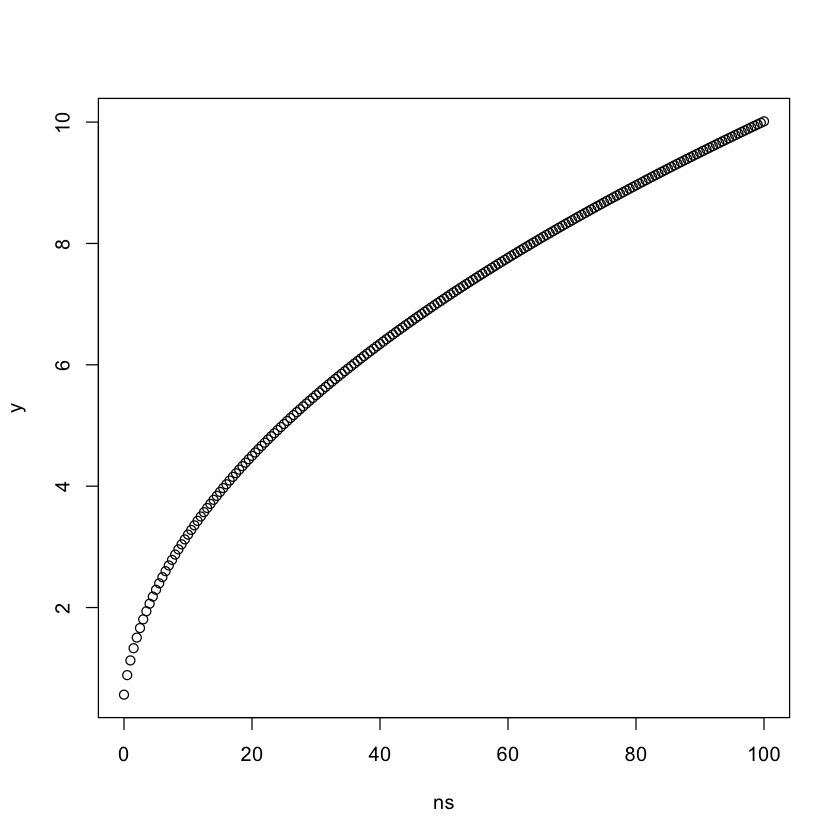

In [90]:
start <- 1/sqrt(pi)

ns <- seq(0, 100, 0.5)
y <- rep(start, length(ns))

for (i in 2:length(ns)) {
    y[i] <- ns[i] / y[i - 1]
}

plot(ns, y)